In [54]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from madmom.audio import Signal
from madmom.audio import FramedSignal
from madmom.audio import stft
from madmom.audio import Spectrogram
from madmom.audio import FilteredSpectrogram
from madmom.audio import LogarithmicFilteredSpectrogram


In [3]:
# reading information about key, mode and file name of the songs stored in MP3 format
df = pd.read_csv('neuralNet_feeding_data.csv')
df

,music_genre_index,artist,song,key,mode,key_and_mode,file_name
0,888,The Prodigy,Firestarter,B,Major,B Major,the prodigy ---- firestarter ---- 0180. the pr...
1,2363,Fatboy Slim,Praise You,C#,Major,C# Major,fatboy slim ---- praise you ---- 0401. fatboy ...
2,2482,Faithless,Insomnia,G,Major,G Major,faithless ---- insomnia ---- 0035. faithless -...
3,3203,Moby,Feeling So Real,G,Major,G Major,moby ---- feeling so real ---- 0392. moby - fe...
4,3527,The Prodigy,Out Of Space,A,Major,A Major,the prodigy ---- out of space ---- 0379. the p...
...,...,...,...,...,...,...,...
453,46969,Vanilla Ice,Ice Ice Baby,D,Major,D Major,vanilla ice ---- ice ice baby ---- 0215. vanil...
454,47304,Ginuwine,Pony,G#,Minor,G# Minor,ginuwine ---- pony ---- 0490. ginuwine - pony ...
455,48547,DJ Jazzy Jeff & The Fresh Prince,Summertime,G,Major,G Major,dj jazzy jeff & the fresh prince ---- summerti...
456,49119,2Pac,Dear Mama,F#,Major,F# Major,2pac ---- dear mama ---- 0116. 2pac - dear mam...


In [4]:
# creating a data set with the songs in WAV format and unifying the audio properties (sample rate and bitrate)
# ffmpeg bash application is used (it is necessary to have it installed in the computer)
# uncoment the os.system line to do the job

sample_rate = 44100
bitrate = 100000
folder_mp3_songs = './music_data/'
folder_wav_songs = './music_data/wav_mono_data/'
wav_file_names = []
for r in df.iterrows():
    file_name = r[1]['file_name']
    file_name_wav = str(r[0])+".wav"
    file_path = folder_mp3_songs+file_name
    file_path_wav = folder_wav_songs+file_name_wav
    bash_command = f'ffmpeg -i "{file_path}" -ac 1 -ar {sample_rate} -ab {bitrate} "{file_path_wav}" > /dev/null 2>&1'
    #print(bash_command)
    #os.system(bash_command)
    wav_file_names.append(file_name_wav)

In [5]:
# adding the name of the WAV files to the data frame
df['wav_file_name'] = wav_file_names

In [6]:
#df.to_csv('neuralNet_feeding_data_with_wav_files.csv', index=False)

In [7]:
df_wavs = pd.read_csv('neuralNet_feeding_data_with_wav_files.csv')
df_wavs

,music_genre_index,artist,song,key,mode,key_and_mode,file_name,wav_file_name
0,888,The Prodigy,Firestarter,B,Major,B Major,the prodigy ---- firestarter ---- 0180. the pr...,0.wav
1,2363,Fatboy Slim,Praise You,C#,Major,C# Major,fatboy slim ---- praise you ---- 0401. fatboy ...,1.wav
2,2482,Faithless,Insomnia,G,Major,G Major,faithless ---- insomnia ---- 0035. faithless -...,2.wav
3,3203,Moby,Feeling So Real,G,Major,G Major,moby ---- feeling so real ---- 0392. moby - fe...,3.wav
4,3527,The Prodigy,Out Of Space,A,Major,A Major,the prodigy ---- out of space ---- 0379. the p...,4.wav
...,...,...,...,...,...,...,...,...
453,46969,Vanilla Ice,Ice Ice Baby,D,Major,D Major,vanilla ice ---- ice ice baby ---- 0215. vanil...,453.wav
454,47304,Ginuwine,Pony,G#,Minor,G# Minor,ginuwine ---- pony ---- 0490. ginuwine - pony ...,454.wav
455,48547,DJ Jazzy Jeff & The Fresh Prince,Summertime,G,Major,G Major,dj jazzy jeff & the fresh prince ---- summerti...,455.wav
456,49119,2Pac,Dear Mama,F#,Major,F# Major,2pac ---- dear mama ---- 0116. 2pac - dear mam...,456.wav


signal shape:  (10036224,)
framed signal shape:  (1138, 8192)
shortTimeFourierTransform shape:  (1138, 4096)
spectogram shape:  (1138, 4096)
filtered spectogram shape:  (1138, 105)
logarithmic filtered spectogram shape:  (1138, 105)


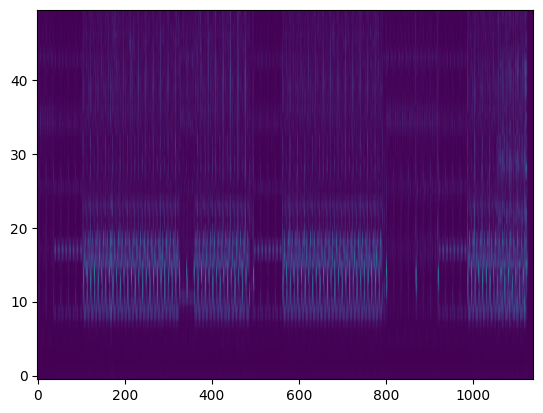

In [8]:
# playing with the madmom library to learn how to create a logarithmic filtered spectogram from an audio sample

s = Signal("./music_data/wav_mono_data/0.wav")
fs = FramedSignal(s, frame_size=8192, fps=5)
shortTimeFourierTransform = stft.STFT(fs)
spec = Spectrogram(shortTimeFourierTransform)
filtered_spec = FilteredSpectrogram(spec, num_bands=24, fmin=65, fmax=2100)
log_filtered_spec = LogarithmicFilteredSpectrogram(filtered_spec)

print("signal shape: ", s.shape)
print("framed signal shape: ", fs.shape)
print("shortTimeFourierTransform shape: ", shortTimeFourierTransform.shape)
print("spectogram shape: ", spec.shape)
print("filtered spectogram shape: ", filtered_spec.shape)
print("logarithmic filtered spectogram shape: ", log_filtered_spec.shape)

plt.imshow(spec[:, :50].T, aspect='auto', origin='lower')

In [9]:
# getting the sizes of the shortest and the longest songs
folder = "./music_data/wav_mono_data/"
signal_sizes = df_wavs.apply(lambda r: (Signal(folder+r["wav_file_name"])).size, axis=1)
arg_min = signal_sizes.argmin()
arg_max = signal_sizes.argmax()
min_size = signal_sizes[arg_min]
max_size = signal_sizes[arg_max]
min_size, max_size

(5351040, 26093952)

In [10]:
df.loc[arg_min], df.loc[arg_max]

(music_genre_index                                                16194
 artist                                                            Blur
 song                                                            Song 2
 key                                                                 G#
 mode                                                             Major
 key_and_mode                                                  G# Major
 file_name            blur ---- song 2 ---- 0198. blur - song 2 [199...
 wav_file_name                                                   14.wav
 Name: 14, dtype: object,
 music_genre_index                                                34804
 artist                                                     The Outlaws
 song                                          Green Grass & High Tides
 key                                                                  E
 mode                                                             Minor
 key_and_mode                         

In [11]:
# information about the shortest song (2 minutes)
folder = "./music_data/wav_mono_data/"
path_min_size_song = folder+df_wavs.loc[arg_min]["wav_file_name"]
os.system(f'ffprobe "{path_min_size_song}"')

ffprobe version 5.1.3-1 Copyright (c) 2007-2022 the FFmpeg developers
  built with gcc 12 (Debian 12.2.0-14)
  configuration: --prefix=/usr --extra-version=1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librist --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --

0

In [12]:
sample_size = int(0.4*min_size) # around 50 seconds (2:01 minutes x 0.4)

In [60]:
### uncomment and run this cell to generate the spectogram data
##############################################################

## The songs are splited in slices of sample_size
## each signal samples is:
## - framed (frame size = 8192, fames per second = 5), 
## - a short time furier transform is applied,
## - with the resulting STFT a spectogram is generated,
## - the spectogram is filtred (number of bands = 24, minimum frequency = 65, maximum frequency = 2100)
## - a logarithmic function is applied after the filter
## All these parameters were used following the following academic paper:
## End-to-End Musical Key Estimation Using a Convolutional Neural Network
## ISBN 978-0-9928626-7-1
## By
## Filip Korzeniowski and Gerhard Widmer
## Department of Computational Perception,
## Johannes Kepler University, Linz, Austria
## Email: filip.korzeniowski@jku.at


#folder_wav_songs = "./music_data/wav_mono_data/"
#folder_spectograms = "./spectogram_data/"
#frame_size = 8192
#fps = 5
#num_bands = 24
#min_frequency = 65
#max_frequency = 2100
#log_filtered_spectograms = []
#mode_labels = []
#file_index = 0
#for r in df_wavs.iterrows():
#    # generating samples of about 50 seconds from this song
#    #######################################################
#    row = r[1]
#    label = r[1]['mode']
#    s = Signal(folder_wav_songs+row["wav_file_name"])
#    #print("signal size: ", s.size)
#    n = int(s.size*0.9 // sample_size)
#    #print("n: ", n)
#    samples_length = sample_size*n
#    #print("samples_len: ", samples_length)
#    start = int((s.size-samples_length)/2)
#    end = start+sample_size
#    for i in range(n):
#        #print("start: ", start, "end: ", end)
#        # creating the logarithmic filtered spectogram of this sample
#        #########################
#        signal_to_nn = s[start:end]
#        fs = FramedSignal(signal_to_nn, frame_size=frame_size, fps=fps)
#        shortTimeFourierTransform = stft.STFT(fs)
#        spec = Spectrogram(shortTimeFourierTransform)
#        filtered_spec = FilteredSpectrogram(spec, num_bands=num_bands, fmin=min_frequency, fmax=max_frequency)
#        log_filtered_spec = LogarithmicFilteredSpectrogram(filtered_spec)
#        log_filtered_spec_nparray = np.array(log_filtered_spec.tolist())
#        #print(log_filtered_spec_nparray.shape)
#        #print(log_filtered_spec_nparray)
#        #print(label)
#        # saving a tuple of the log filtered spectogram and the corresponding label to a file
#        #####################################################################################
#        file_path = f'{folder_spectograms}{file_index}.nparray.pkl'
#        file_index += 1
#        variable_to_save = (log_filtered_spec_nparray, label)
#        with open(file_path, 'wb') as file:
#            pickle.dump(variable_to_save, file)
#        #with open(file_path, 'rb') as file:
#        #    loaded_variable = pickle.load(file)
#        #print(loaded_variable[0].shape)
#        #print(loaded_variable[0])
#        #print(loaded_variable[1])
#        start = end
#        end = start+sample_size
#    #print()

